# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o DataFrame
df = pd.read_csv('G:\EBAC\Provas\Modulo 10\previsao_de_renda.csv')

# Selecionar vaviáveis quantitativas
df_numeric = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

Com as alterações feitas, vamos a matriz de correlação e os gráficos:

G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

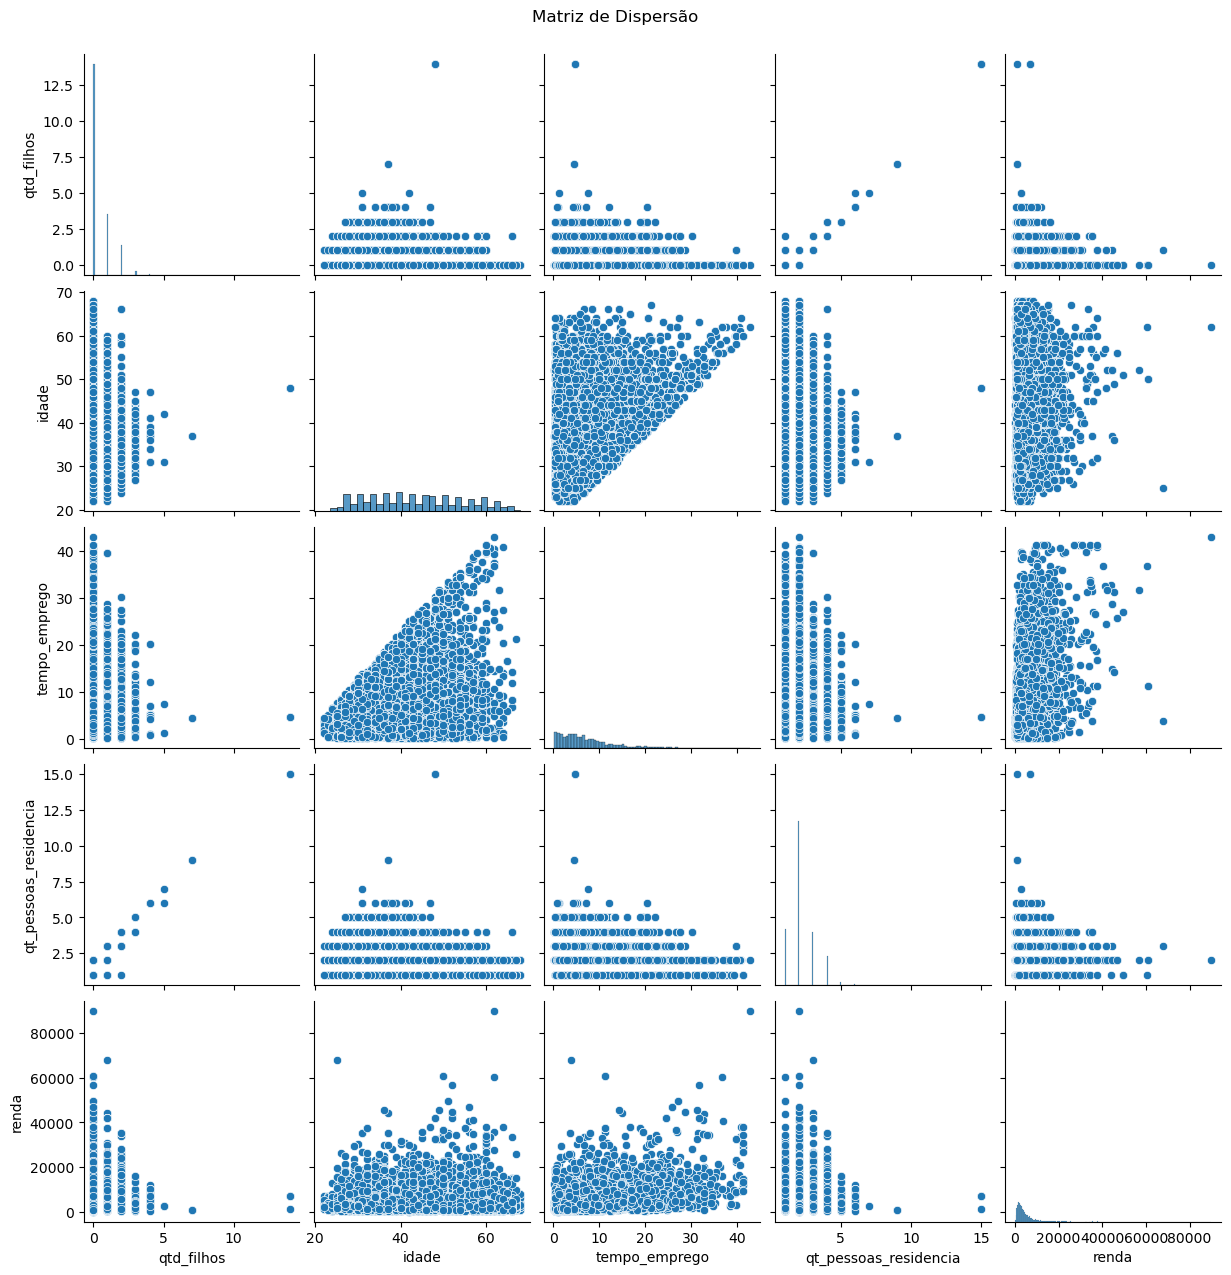

In [8]:
# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Gráfico de matriz de dispersão
sns.pairplot(df_numeric)
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

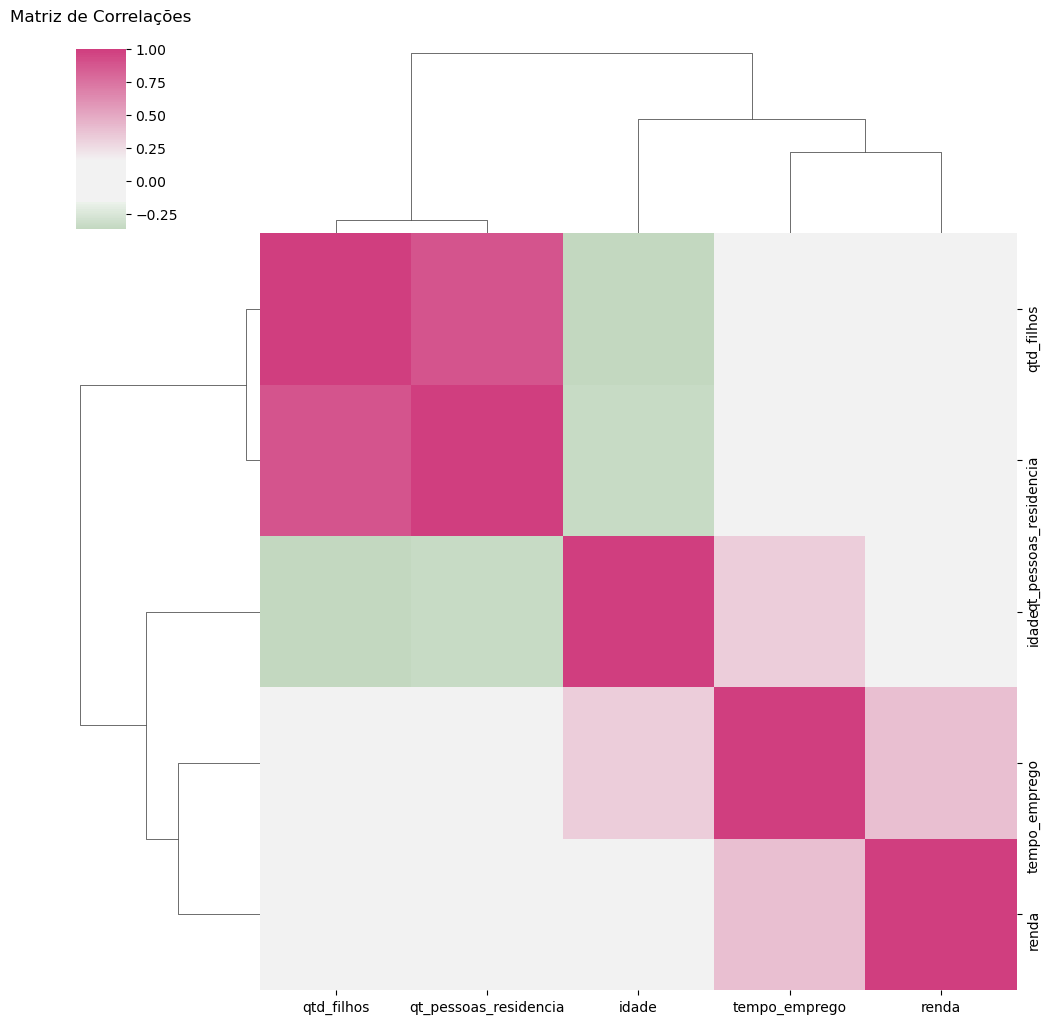

In [10]:
# Gráfico da matriz de correlações
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=40, center='light')
sns.clustermap(correlation_matrix, figsize=(10, 10), center=0, cmap=cmap)
plt.title('Matriz de Correlações', pad=20)
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

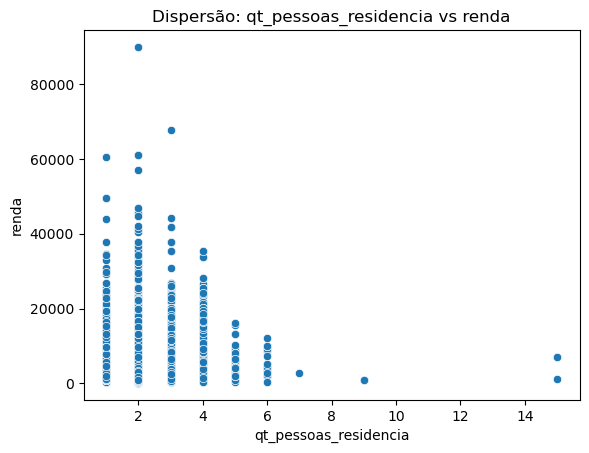

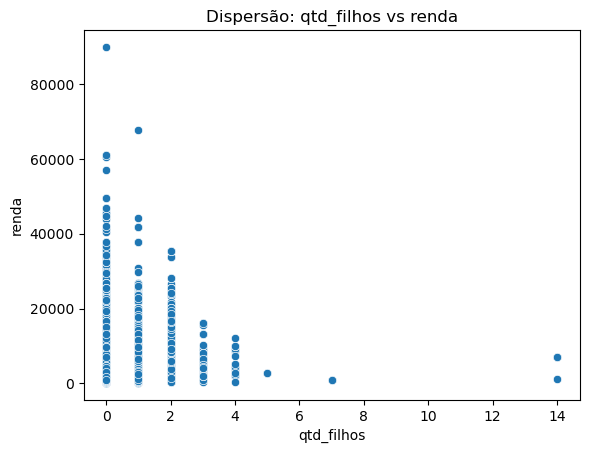

In [12]:
# Gráfico de dispersão para as duas variáveis mais correlacionadas com renda
sns.scatterplot(x='qt_pessoas_residencia', y='renda', data=df)
plt.title('Dispersão: qt_pessoas_residencia vs renda')
plt.show()

sns.scatterplot(x='qtd_filhos', y='renda', data=df)
plt.title('Dispersão: qtd_filhos vs renda')
plt.show()

### Podemos notar que, as chances da pessoa ter mais renda com uma menor quantidade de pessoas na residência ou menor quantidade de filhos é maior em relação a uma pessoa que possui mais pessoas na residência ou mais filhos.

3) Na su aopinião, há outliers na variável renda?

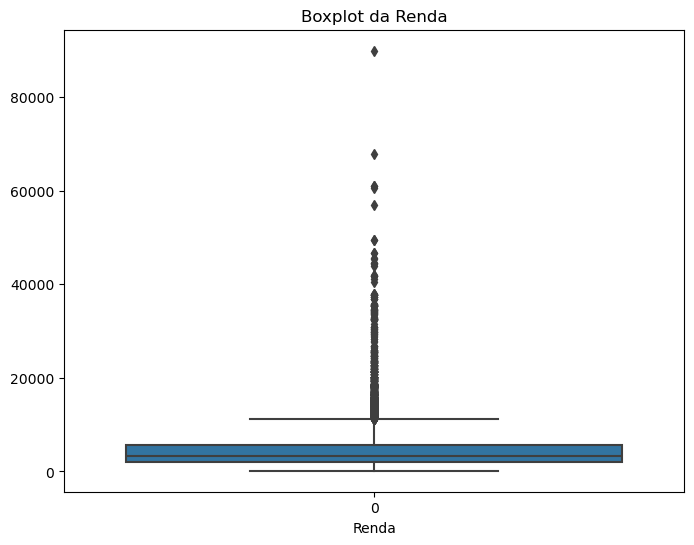

Número de outliers na variável renda: 1026


In [19]:
# Verificação de outliers na variável renda
plt.figure(figsize=(8, 6))
sns.boxplot(df['renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

# Análise estatística p/ identificar outliers
q1 = df['renda'].quantile(0.25)
q3 = df['renda'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['renda'] < (q1 - 1.5 * iqr)) | (df['renda'] > (q3 + 1.5 * iqr))]

print(f"Número de outliers na variável renda: {outliers.shape[0]}")

4) Calcule o logaritmo da variável renda e repita a sequência de análise

G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

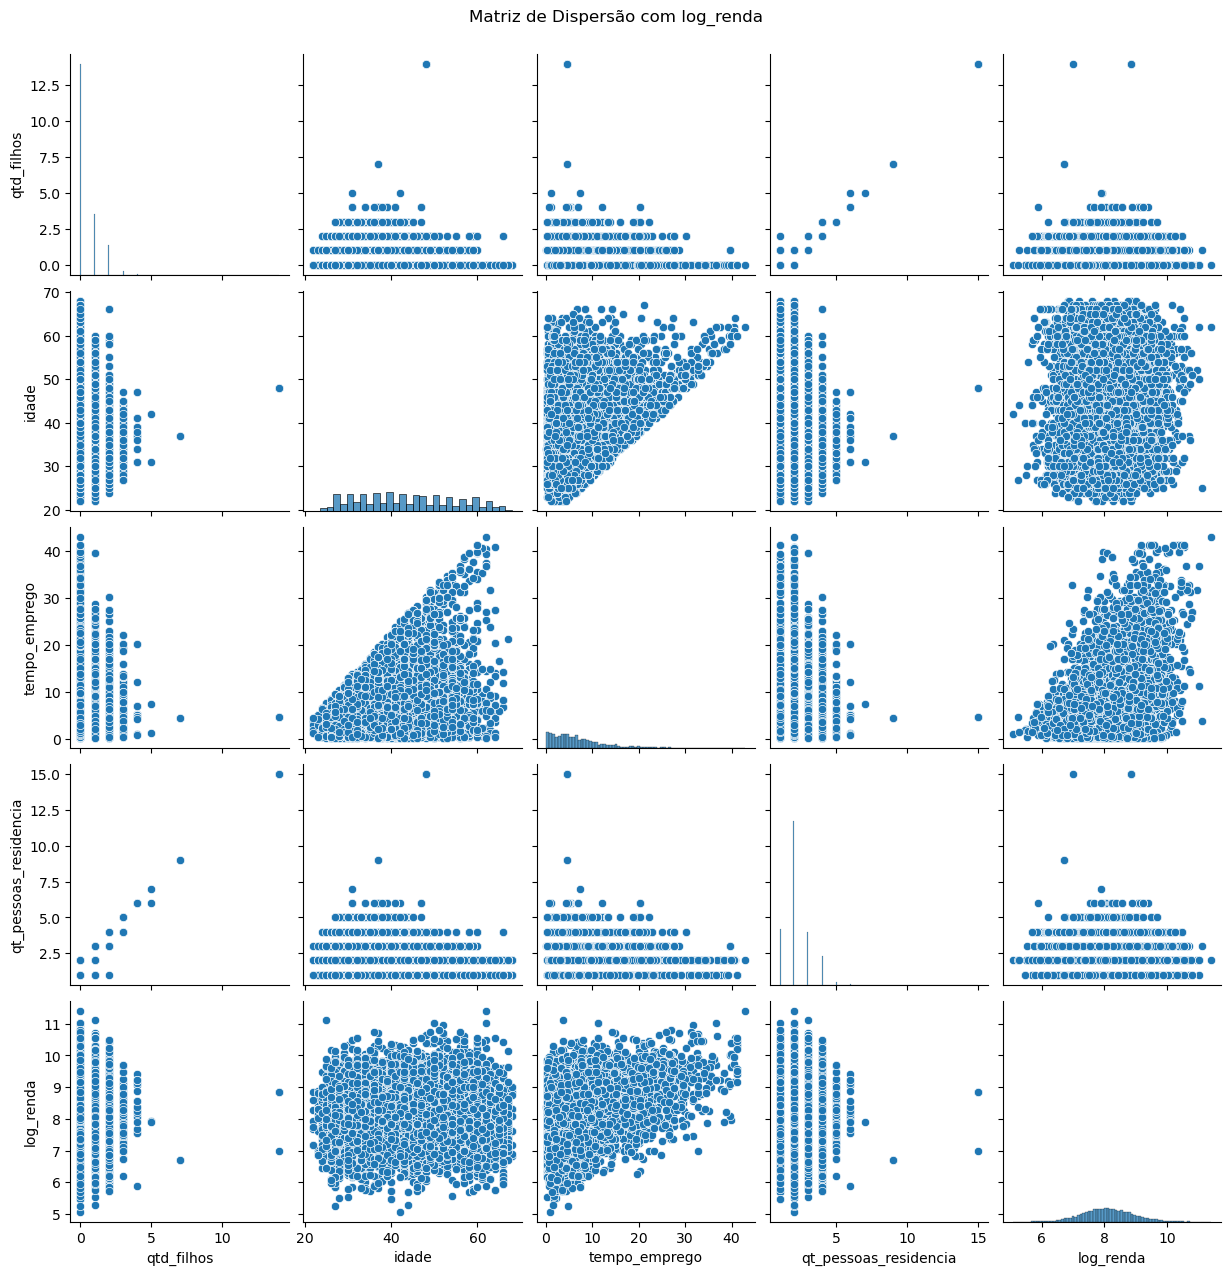

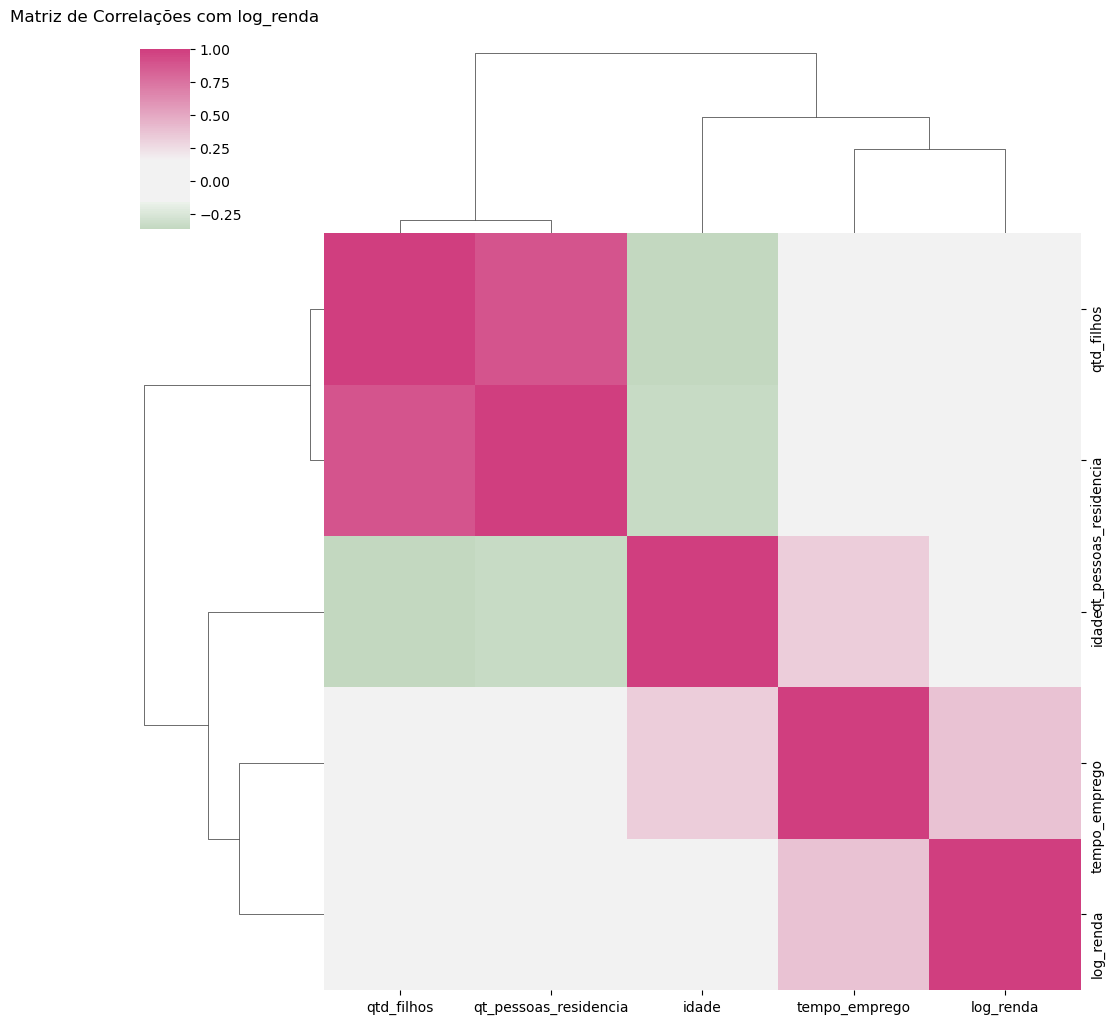

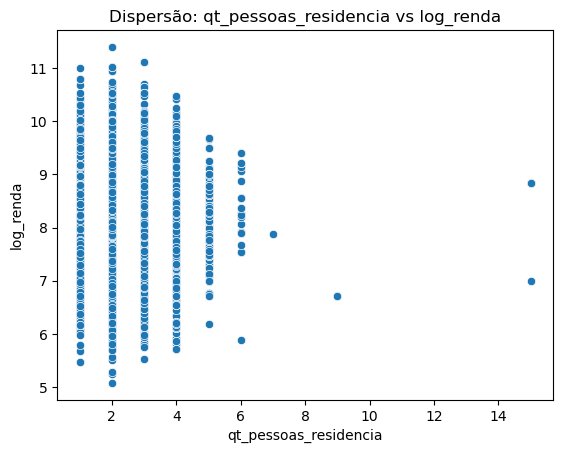

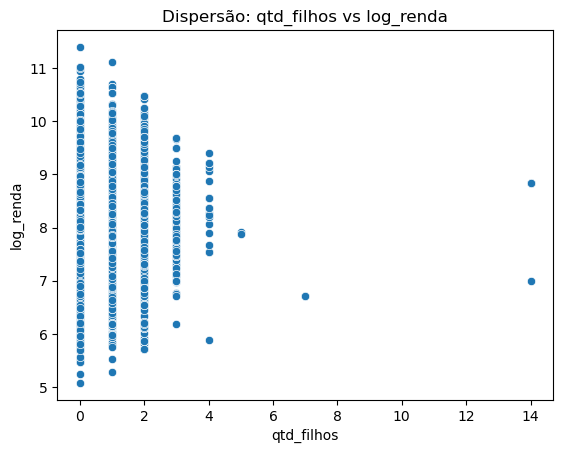

In [21]:
# Calcular o logaritmo da variável renda
df['log_renda'] = np.log(df['renda'])

# Selecionar as variáveis quantitativas com log_renda
df_numeric_log = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']]

# Calcular a matriz de correlação com log_renda
correlation_matrix_log = df_numeric_log.corr()

# Gráfico de matriz de dispersão com log_renda
sns.pairplot(df_numeric_log)
plt.suptitle('Matriz de Dispersão com log_renda', y=1.02)
plt.show()

# Gráfico da matriz de correlações com log_renda
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=40, center='light')
sns.clustermap(correlation_matrix_log, figsize=(10, 10), center=0, cmap=cmap)
plt.title('Matriz de Correlações com log_renda', pad=20)
plt.show()

# Gráficos de dispersão para as duas variáveis mais correlacionadas com log_renda
sns.scatterplot(x='qt_pessoas_residencia', y='log_renda', data=df)
plt.title('Dispersão: qt_pessoas_residencia vs log_renda')
plt.show()

sns.scatterplot(x='qtd_filhos', y='log_renda', data=df)
plt.title('Dispersão: qtd_filhos vs log_renda')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

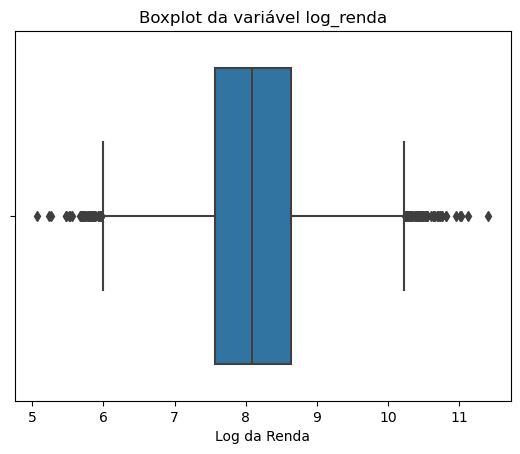

Número de outliers na variável log_renda: 146


In [25]:
# Calcular o logaritmo da variável renda
df['log_renda'] = np.log(df['renda'])

# Boxplot da variável log_renda para verificar outliers
sns.boxplot(x=df['log_renda'])
plt.title('Boxplot da variável log_renda')
plt.xlabel('Log da Renda')
plt.show()

# Análise estatística para identificar outliers em log_renda
q1_log = df['log_renda'].quantile(0.25)
q3_log = df['log_renda'].quantile(0.75)
iqr_log = q3_log - q1_log
outliers_log = df[(df['log_renda'] < (q1_log - 1.5 * iqr_log)) | (df['log_renda'] > (q3_log + 1.5 * iqr_log))]

print(f"Número de outliers na variável log_renda: {outliers_log.shape[0]}")

### Com a aplicação do log nas variáveis, é notável que o número de outliers diminuiu drasticamente, saindo de 1026, para 146 outliers.
Com isso, chego a conclusão de que o log sim, melhorou a análise.